<a href="https://colab.research.google.com/github/aaryyya/MLDLAlgorithmsTYITAssignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

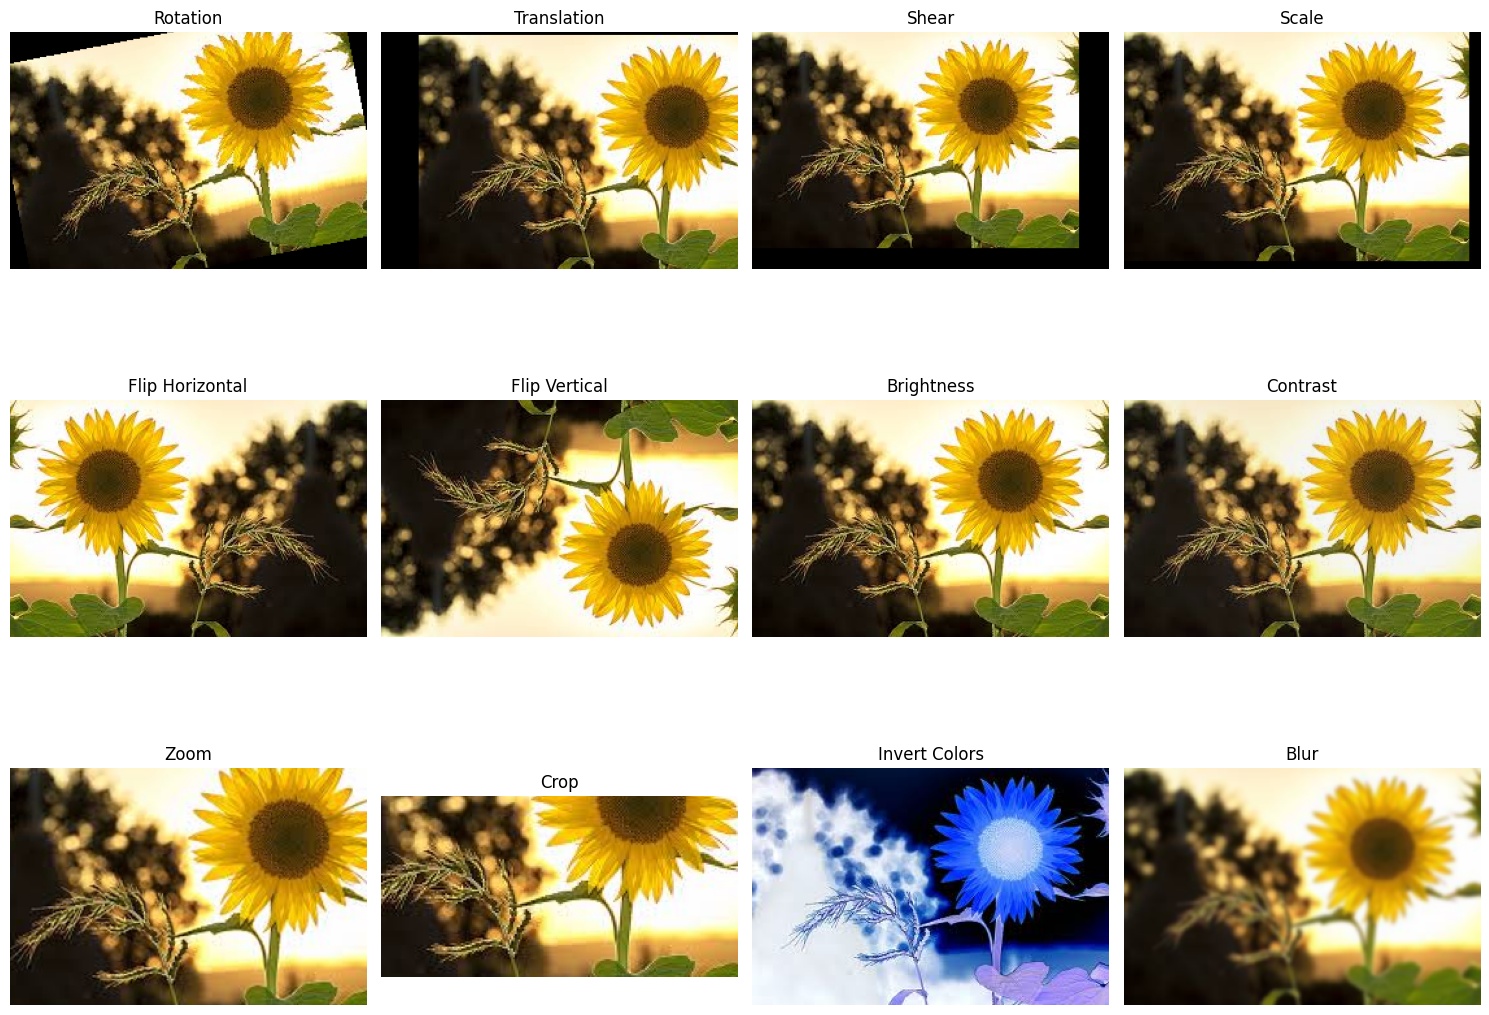

In [1]:
from PIL import Image, ImageEnhance, ImageFilter
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to perform affine transformation on an image
def affine_transform(image, shear=0, translate=(0, 0), rotate_angle=0, scale=1):
    width, height = image.size
    matrix = [
        scale * (np.cos(np.radians(rotate_angle)) + shear), -np.sin(np.radians(rotate_angle)), translate[0],
        np.sin(np.radians(rotate_angle)), scale * (np.cos(np.radians(rotate_angle)) + shear), translate[1]
    ]
    return image.transform((width, height), Image.AFFINE, matrix)

# Function to perform specific augmentation operations and return individual images
def perform_augmentation_operations(image):
    augmented_images = []

    # Rotation
    rotated_image = image.rotate(random.randint(-30, 30))
    augmented_images.append(('Rotation', rotated_image))

    # Translation (affine transform)
    translated_image = affine_transform(image, translate=(random.randint(-30, 30), random.randint(-30, 30)))
    augmented_images.append(('Translation', translated_image))

    # Shear
    shear_image = affine_transform(image, shear=random.uniform(-0.2, 0.2))
    augmented_images.append(('Shear', shear_image))

    # Scale (Zoom)
    scale_image = affine_transform(image, scale=random.uniform(0.8, 1.2))
    augmented_images.append(('Scale', scale_image))

    # Flip Horizontal
    flip_horizontal_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    augmented_images.append(('Flip Horizontal', flip_horizontal_image))

    # Flip Vertical
    flip_vertical_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    augmented_images.append(('Flip Vertical', flip_vertical_image))

    # Brightness
    brightness_image = ImageEnhance.Brightness(image).enhance(random.uniform(0.7, 1.3))
    augmented_images.append(('Brightness', brightness_image))

    # Contrast
    contrast_image = ImageEnhance.Contrast(image).enhance(random.uniform(0.7, 1.3))
    augmented_images.append(('Contrast', contrast_image))

    # Zoom (Crop and Resize)
    width, height = image.size
    crop_size = random.uniform(0.7, 1.0)
    left = (width - width * crop_size) / 2
    upper = (height - height * crop_size) / 2
    right = (width + width * crop_size) / 2
    lower = (height + height * crop_size) / 2
    zoom_image = image.crop((left, upper, right, lower)).resize((width, height))
    augmented_images.append(('Zoom', zoom_image))

    # Crop
    crop_width = random.randint(int(0.5 * width), width)
    crop_height = random.randint(int(0.5 * height), height)
    left = random.randint(0, width - crop_width)
    top = random.randint(0, height - crop_height)
    crop_image = image.crop((left, top, left + crop_width, top + crop_height))
    augmented_images.append(('Crop', crop_image))

    # Invert Colors
    invert_image = Image.eval(image, lambda x: 255 - x)
    augmented_images.append(('Invert Colors', invert_image))

    # Blur
    blur_image = image.filter(ImageFilter.GaussianBlur(random.uniform(0.5, 2.0)))
    augmented_images.append(('Blur', blur_image))

    return augmented_images

# Load your image ("image.jpg")
image = Image.open("image.jpeg")

# Perform all augmentations
augmented_images = perform_augmentation_operations(image)

# Create a grid layout to display all the augmented images
num_images = len(augmented_images)
grid_size = (3, 4)  # Adjust this based on the number of images (3 rows, 4 columns)

fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 12))

# Flatten axes array to easily index through
axes = axes.flatten()

# Loop through each augmented image and display it in the grid
for i, (title, augmented_image) in enumerate(augmented_images):
    axes[i].imshow(augmented_image)
    axes[i].set_title(title)
    axes[i].axis('off')  # Hide axes for clarity

# Hide empty subplots (if any)
for j in range(len(augmented_images), len(axes)):
    axes[j].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()